In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurods
%matplotlib inline

In this homework, we will go over the derivation we made in the last lecture. This homework might appear long, however, most of the questions are focused around reading this notebook and understanding the definition. 

We will load simulated data from a voxel to a stimulus time series. Use the cells below to load the data.

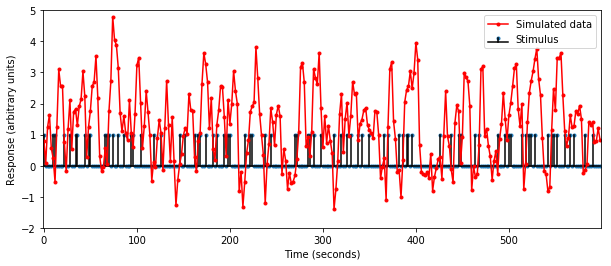

In [2]:
# Plotting function from Lecture08 that we will continue to use
def stim_resp_plot(t, stimulus, response, yl=(-0.2, 1.2), label_stim='Stimulus', label_resp='BOLD response (HRF)'):
    """Plot stimulus and response."""
    plt.figure(figsize=(10,4))
    plt.stem(t, stimulus, linefmt='k-', markerfmt='.', basefmt='k-', label=label_stim)
    plt.plot(t, response, 'r.-', label=label_resp)
    plt.ylim(yl)
    plt.xlim([-1,t.max()+1])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Response (arbitrary units)')
    _ = plt.legend()


filename = 'example_data_01.npz'
ex_data = np.load(filename)
t = ex_data['t']
n_tps = len(t)
stimulus = ex_data['x']
data_sim = ex_data['data']
stim_resp_plot(t, stimulus, data_sim, yl=(-2, 5), label_stim='Stimulus', label_resp='Simulated data')

We saw in class that we should account for the hemodynamic response before trying to relate the stimulus and the response time courses. In the cell below, we generate a hemodynamic response function with TR = 2 seconds. We then use it to convolve the stimulus time course:

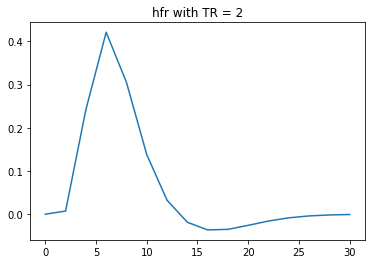

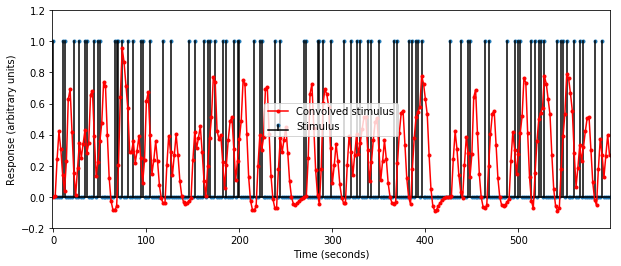

In [3]:
t2, hrf_2 = neurods.fmri.hrf(tr=2)
plt.plot(t2, hrf_2);
plt.title('hfr with TR = 2')
conv_stimulus = np.convolve(stimulus, hrf_2, mode='full')[:n_tps]
stim_resp_plot(t, stimulus, conv_stimulus, label_stim='Stimulus', label_resp='Convolved stimulus');

We want to fit a linear model that express the activity in the voxel as a function of the convolved stimulus:

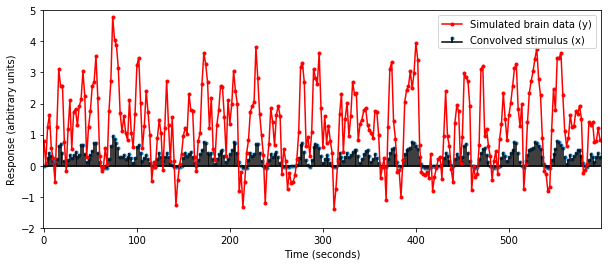

In [4]:
stim_resp_plot(t, conv_stimulus, data_sim, yl=(-2, 5),label_stim='Convolved stimulus (x)', label_resp='Simulated brain data (y)');

More specifically, we **assume** that we can express the activity of the voxel $y_j$ at time point $j$ as:

\begin{align}
y_j = w_0 + w x_j+ \epsilon_j
\end{align}

The figure below from wikipedia is an illustration of this problem. Assume that the points correspond to our samples, where the x axis is the value of the convolved stimulus and the y axis is the value of the corresponding brain response. Fitting the linear model specified above optimally means finding a line such that the  

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg")

Before we explore this further, let's take a detour to understand matrix multiplication.

https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/626px-Matrix_multiplication_diagram_2.svg.png

### Matrix Multiplication:

A matrix multiplication is an operation on two matrices that produces a new matrix:


\begin{align}
{\bf AB} = {\bf C}
\end{align}

We can only multiply two matrices ${\bf A}$ and ${\bf B}$ if the number of columns of ${\bf A}$   is equal to the number of rows of ${\bf B}$. 

If ${\bf A}$ is $(r\times t)$ and ${\bf B}$ is $(t\times c)$, then ${\bf C}$ will be $(r\times c)$.

This is the elements of ${\bf C}$ are computed:
- the entry ${c}_{i,j}$, i.e. the entry on the $i$th row of ${C}$ and the $j$th column is computed by:
    - taking the $i$th row of the first matrix (A)
    - taking the $j$th column of the second matrix (B)
    - these two vectors will have the same lenght. Multiply their corresponding entries (i.e. the first element with the first element etc).
    - take the sum of the elementwise multiplication.

The picture below, taken from the wikipedia article on matrix multiplication, illustrates how to do this:

In [6]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/626px-Matrix_multiplication_diagram_2.svg.png")

In that picture, we multiply a (3,2) matrix with a (2,3) matrix to get a (3,3) matrix.

The entry in the first row and the second column is equal to:
$$ a_{1,1}\times b_{1,2} + a_{1,2}\times b_{2,2}.$$

The entry in the third row and the third column is equal to:
$$ a_{3,1}\times b_{1,3} + a_{3,2}\times b_{2,3}.$$


If you want more information about matrix multiplication, you can see this video from the Khan academy, it even includes practice examples at the end: https://www.khanacademy.org/math/precalculus/precalc-matrices/multiplying-matrices-by-matrices/v/matrix-multiplication-intro

### 1- [1pt] If the multiplication is possible between the following matrices, report the size of the resulting matrix. Otherwise, specify that the multiplication is not possible:

In [7]:
# 1-a
# Size of A is (2,4) and size of B is (4,5)
# What is the size of C = AB?
### STUDENT ANSWER

In [8]:
# 1-b
# Size of A is (3,3) and size of B is (3,1)
# What is the size of C = AB?
### STUDENT ANSWER

In [9]:
# 1-c
# Size of A is (4,3) and size of B is (4,3)
# What is the size of C = AB?
### STUDENT ANSWER

In [10]:
# 1-d
# Size of A is (3,1) and size of B is (1,4)
# What is the size of C = AB?
### STUDENT ANSWER

### 2- [1pt] Report the entries in the product of the following matrices:

\begin{align}
\left[\begin{array}{c,c,c}
3 & -2 & 3 \\
9 & -1 & 4\\
2 & 4 & r \\ 
\end{array}\right]
\left[\begin{array}{c,c}
7 & -3  \\
s & 4 \\
1 & 2  \\ 
\end{array}\right]
= 
\left[\begin{array}{c,c}
c_{1,1} & c_{1,2} & c_{1,3} \\
c_{2,1} & c_{2,2} & c_{2,3}\\
c_{3,1} & c_{3,2} & c_{3,3}\\
\end{array}\right]
\end{align}

Write down the corresponding product in terms of r and s.

In [11]:
# 2-a
# What is the value of c_{1,1}?
### STUDENT ANSWER
# 21-2s+3 

In [12]:
# 2-b
# What is the value of c_{3,1}?
### STUDENT ANSWER
# 14+4s+r 

### 3- [1pt] Replace r by 2 and s by -5.  

- Use the function np.dot to print out the product of the two matrices above. 
- Then double check your answer to parts 2-a and 2-b when you use these values of r and s. Show that you get the same values.

In [13]:
# Hint: use the following code to define the matrices. You should replace r and s by their values
# A = np.array( [ [3,-2,3], [9,-1,4], [2,4,r] ]  )
# B = np.array( [ [7,-3], [s,4], [1,2] ]  )
### STUDENT ANSWER
A = np.array( [ [3,-2,3], [9,-1,4], [2,4,2] ]  )
B = np.array( [ [7,-3], [-5,4], [1,2] ]  )
print(A)
print(B)
print(np.dot(A,B))

[[ 3 -2  3]
 [ 9 -1  4]
 [ 2  4  2]]
[[ 7 -3]
 [-5  4]
 [ 1  2]]
[[ 34 -11]
 [ 72 -23]
 [ -4  14]]


# Expressing our linear model as a matrix multiplication


Back to our model, the activity of the voxel $y_j$ at time point $j$ is defined as:

\begin{align}
y_j = w_0 + w x_j+ \epsilon_j
\end{align}


We have n_tps = 300 datapoints. Let's represent all these datapoints together in one equation:
\begin{align}
\left[\begin{array}{c}
y_0 \\
y_1\\
y_2\\
\ldots \\ 
y_{299}\\
\end{array}\right]
= 
\left[\begin{array}{c,c}
1 & x_0 \\
1 & x_1\\
1 & x_2\\
\ldots & \ldots \\ 
1 & x_{299}\\
\end{array}\right]
\left[\begin{array}{c}
w_0 \\
w\\
\end{array}\right]
+
\left[\begin{array}{c}
\epsilon_0 \\
\epsilon_1\\
\epsilon_2\\
\ldots \\ 
\epsilon_{299}\\
\end{array}\right]
\end{align}

We can write the problem as:

\begin{align}
Y =  {\bf X} W +\epsilon
\end{align}

where
- $Y$ is n x 1
\begin{align}
 Y = \left[\begin{array}{c}
y_0 \\
y_1\\
y_2\\
\ldots \\ 
y_{299}\\
\end{array}\right]
\end{align}
- ${\bf X}$ is n x d, here d = 2

\begin{align}
 {\bf X} =  \left[\begin{array}{c,c}
1 & x_0 \\
1 & x_1\\
1 & x_2\\
\ldots & \ldots \\ 
1 & x_{299}\\
\end{array}\right]
\end{align}


- $W$ is d x 1

\begin{align}
 W =  
\left[\begin{array}{c}
w_0 \\
w\\
\end{array}\right]
\end{align}

- and $\epsilon$ is n x 1

\begin{align}
\epsilon = \left[\begin{array}{c}
\epsilon_0 \\
\epsilon_1\\
\epsilon_2\\
\ldots \\ 
\epsilon_{299}\\
\end{array}\right].
\end{align}

The notation we are following here is that:
- $a$ is a scalar
- $A$ is a vector
- ${\bf A}$ is a matrix.

### 4- [1pt] Explain in the cell below how the matrix operation above works. 

- Illustrate your explanation by showing how you can get the formulation of $y_5$ in terms of $x_5$ and $\epsilon_5$

In [14]:
### STUDENT ANSWER


In our problem setup, we know $Y$ (the simulated voxel data)  and we know ${\bf X}$ (a column of ones and the convolved stimulus). We want to find the parameters $W$ of our model. We are trying to find th

Due to the noise, we cannot exactly recover $W$. However, we would like to find a solution $W^*$ that minimizes the following error as much as possible:

\begin{align}
error = \sum_{j = 1}^N (y_j - X_j W)^2 = ||Y - {\bf X} W||_2^2
\end{align}

This is the sum of squared errors. 

To minimize this equation with respect to $W$, we first need to find the derivative with respect to $W$:

\begin{align}
\frac{\delta \ error}{\delta W} &=& \frac{\delta ||Y - {\bf X} W||_2^2}{\delta W}\\
 &=& -2{\bf X}^\top (Y - {\bf X} W)\\
\end{align}

The above identity is derived using matrix calculus, which is outside the scope of this class.

The minimum is achieved when the derivative is zero:

\begin{align}
-2{\bf X}^\top (Y - {\bf X} \hat W^* ) &= 0\\
{\bf X}^\top (Y - {\bf X} \hat W^*) &= 0\\
{\bf X}^\top Y - {\bf X}^\top{\bf X}  W^* &= 0\\
{\bf X}^\top Y &= {\bf X}^\top{\bf X}  W^* \\
\end{align}

Matrix multiplication is commutative, meaning that ${\bf A B C = (AB)C = A(BC)}$.

We will therefore rewrite the ${\bf X}^\top{\bf X}  W$ term as $({\bf X}^\top{\bf X})  W^*$:


\begin{align}
{\bf X}^\top Y = ({\bf X}^\top{\bf X})  W^* \\
\end{align}


## Covariance matrix ${\bf X}^\top{\bf X}$

Let's investigate the $({\bf X}^\top{\bf X})$ term a little more. The product of the transpose of a matrix ${\bf X^\top}$ with that matrix ${\bf X}$ is called a covariance matrix. 


### 5- [1pt] If ${\bf X}$ is a (5, 3) matrix:
- what is the size of ${\bf X}^\top$?

Hint: Remember we have encountered matrix transposes multiple times in the course. To get the transpose of a matrix `X` in python, we used `X.T`.


In [15]:
### STUDENT ANSWER

- what is the size of ${\bf X}^\top{\bf X}$?

In [16]:
### STUDENT ANSWER

- if ${\bf X}$ is (n, d) is what is the size of ${\bf X}^\top{\bf X}$?

In [17]:
### STUDENT ANSWER

$\Sigma = {\bf X}^\top{\bf X}$ is called the covariance matrix because it represents the covariance (= the amount of joint variance) between the columns of ${\bf X}$. 

The entry $\Sigma_{i,j}$ represents the covariance between the column $i$ and the column $j$ of ${\bf X}$. If $\Sigma_{i,j} = 0$, it means that the columns  $i$ and  $j$ are not correlated. 

The diagonal entries $\Sigma_{i,i}$ represent the variance of each column of ${\bf X}$ (i.e. the covariance of column $i$ with itself).

### Matrix inverse 


For the next step, we need some linear algebra knowledge. Basically the problem we have now is in the form:

\begin{align}
{\bf X}^\top Y &= ({\bf X}^\top{\bf X})  W^* \\
A &= {\bf B} W^* \\
\end{align}

Where $A = {\bf X}^\top Y$ and $ B = {\bf X}^\top{\bf X}$.

$A$ has dimension $(d\times n) \times (n \times 1) = (d \times 1)$. 

${\bf B}$ has dimension $(d\times n) \times (n \times d) = (d \times d)$. 

Let's compute $A$ and ${\bf B}$ for our example. First let's define ${\bf X}$ and $Y$:



In [1]:
X = np.vstack([np.ones_like(conv_stimulus),conv_stimulus]).T
Y = data_sim
Y = Y.reshape([Y.shape[0],1]) # this makes sure that the shape of Y is (300,1) and not (300)

NameError: name 'np' is not defined

### 6- [1pt] Compute the matrices $A$ and ${\bf B}$ and print them:

- Compute and print $A = {\bf X}^\top Y$ and $ B = {\bf X}^\top{\bf X}$.


In [19]:
### STUDENT ANSWER
A = np.dot(X.T, Y)
B = np.dot(X.T, X)

print ('A')
print(A)
print ('B')
print(B)

A
[[ 380.99429159]
 [ 184.38286672]]
B
[[ 300.           81.06764924]
 [  81.06764924   39.83485492]]


## Back to the derivation

We want to solve:

\begin{align}
A &= {\bf B} W^* \\
\end{align}

Let's step back for a moment. What would we have done if instead, we had a, b and w, all scalars, and we were solving:

\begin{align}
a = b  w \\
\end{align}

For example, we could have the following equation:

\begin{align}
6 = 3  w \\
\end{align}


then the solution would be: $w = \frac{6}{3} = 2$.

When dealing with matrices instead of scalars, the analogous operation is not as simple. Let's go back to our problem:

\begin{align}
A = {\bf B}  W^* \\
\end{align}

we need to somehow "divide" $A$ by ${\bf B}$. We will use the concept of matrix inversion to accomplish this. 

A square matrix is a matrix with an equal number of rows and columns. 

A square matrix ${\bf B}$ is invertable if there exist another matrix ${\bf C}$ such that ${\bf BC} = {\bf I_n}$,  where ${\bf  I_n}$ is the identity matrix of size $n\times n$.

An identity matrix is a square matrix where all the entries are zero, except the diagonal, which is equal to 1. Here is an example of an identity matrix ${\bf  I_n}$ with $ n = 3$:

In [20]:
print(np.eye(3))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


If a matrix ${\bf C}$ exists such that ${\bf BC} = {\bf I_n}$, we call ${\bf C}$ the inverse of ${\bf B}$, and we usually denote it as ${\bf B}^{-1}$: 

${\bf BB}^{-1} = {\bf I_n}$. 

In order for the matrix ${\bf B}^{-1}$ to exist, the matrix ${\bf B}$  need to satisfy some conditions. Usually, if a matrix has more rows than columns, then these conditions are usually satisfied when we take the covariance matrix. However, this is not always true. We will not go into the details of when a matrix is invertable in this homework. 

### 7 - [1pt] Multiply the matrix below with an identity matrix with n = 2:

\begin{align}
 {\bf D} =  \left[\begin{array}{c,c}
3 & -1 \\
2 & 1 \\
\end{array}\right]
\end{align}

I.e. find the entries in ${\bf F}$:
\begin{align}
 {\bf F} = {\bf D} {\bf  I} =  \left[\begin{array}{c,c}
3 & -1 \\
2 & 1 \\
\end{array}\right]
 \left[\begin{array}{c,c}
1 & 0 \\
0 & 1 \\
\end{array}\right]
= \left[\begin{array}{c,c}
f_{1,1} & f_{1,2} \\
f_{2,1} & f_{2,2} \\
\end{array}\right]
\end{align}


In [21]:
### STUDENT ANSWER


### Deriving the OLS solution

Now we are able to proceed with the derivation, by multiplying both sides of the equation by the inverse of ${\bf X}^\top{\bf X}$:

\begin{align}
{\bf X}^\top Y &= ({\bf X}^\top{\bf X}) W \\
({\bf X}^\top{\bf X})^{-1} {\bf X}^\top Y &= ({\bf X}^\top{\bf X})^{-1} ({\bf X}^\top{\bf X}) W^*\\
\end{align}

We know that by definition: $({\bf X}^\top{\bf X})^{-1} ({\bf X}^\top{\bf X}) = {\bf I_n}$:


\begin{align}
({\bf X}^\top{\bf X})^{-1} {\bf X}^\top Y &= ({\bf X}^\top{\bf X})^{-1} ({\bf X}^\top{\bf X}) W^*\\
({\bf X}^\top{\bf X})^{-1}{\bf X}^\top Y &= {\bf I_n} W^* \\
({\bf X}^\top{\bf X})^{-1}{\bf X}^\top Y &= W^* \\
\end{align}


After all this work, $ W^* =  ({\bf X}^\top{\bf X})^{-1}{\bf X}^\top Y$ is the Ordinary Least Squares Solution, OLS solution for short. 


### 8- [1pt] Using the space below, use the functions np.dot, .T and inv to implement the OLS solution. 

- Your function should take as input a matrix X and a matrix Y and return the OLS solution.

Hint: the function inv imported below returns the inverse of a square matrix.

- Use your function to find W. The variables X and Y should already be defined in your workspace from the cells above. 

- Print the value of W for the dataset loaded here: print the intercept and the slope separately and specify which is which.


In [22]:
from numpy.linalg import inv

def my_OLS(X,Y):
### STUDENT ANSWER
    return np.dot( inv(np.dot(X.T,X)), np.dot(X.T, Y))

W = my_OLS(X,Y)
print ('intercept is {}'.format(W[0]))
print ('slope is {}'.format(W[1]))

intercept is [ 0.04264518]
slope is [ 4.54189485]


### 9- [1pt] Use the W vector you just obtained to predict the activity for new stimulus 


Using the model predicted above in W, give your best prediction about how the signal would look like in that hypothetical voxel:
- In the cell below, we convolved the new stimulus variable with hrf_2
- We defined the variable new_X by concatenating a vector of ones with the new convolved stimulus.
- Use the model W to predict the activity corresponding to the new stimulus: new_Y
- use the stim_resp_plot function to plot the stimulus with your predicted response

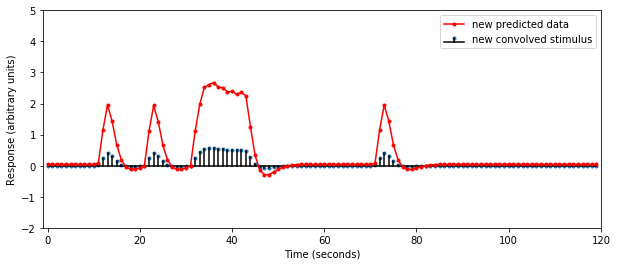

In [23]:
new_stimulus_times = [10,20,30,32,34,36,38,40,70]
new_t = np.arange(120)
new_stimulus = np.zeros((120))
new_stimulus[new_stimulus_times] = 1
new_conv_stimulus = np.convolve(new_stimulus, hrf_2)[:120]
new_X = np.vstack([np.ones_like(new_conv_stimulus),new_conv_stimulus]).T

### STUDENT ANSWER
new_Y = np.dot(new_X,W)
stim_resp_plot(new_t, new_conv_stimulus, new_Y, yl=(-2, 5),
               label_stim='new convolved stimulus', label_resp='new predicted data')

### 10- [1pt] Explain an xkcd comic

- read the following xkcd comic. It illustrates an attempt to fit a linear model to data and predict the value of the output at a specific point in time
    - How many data points are used?
    - What time point is predicted?
- why is this comic funny? Or in other terms, why is the model inadequate?


In [24]:
Image(url="https://imgs.xkcd.com/comics/extrapolating.png")

In [25]:
### STUDENT ANSWER